In [1]:
import prince
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mca import MCA
from kmodes.kmodes import KModes # for the clustering technique
import plotly.express as px
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection
from sklearn.preprocessing import LabelEncoder
import seaborn as sns # for plotting boxplots
from scipy.stats import skew # for skewness calculation

In [2]:
# Load the data
data = pd.read_excel("dataset.xlsx")
data.drop(['Year of survey conduction.'], axis=1, inplace=True)

In [3]:
# Create a copy of the original data set
data_num = data.copy()

# Create a label encoder for each categorical column
label_encoders = {}
categorical_columns =  ["Profession", "Would you recommend remote work?", "What country do you live in currently?", "Biggest struggle working remotely", "Biggest benefit working remotely"]
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data_num[col] = label_encoders[col].fit_transform(data_num[col])


### Outliers box plot

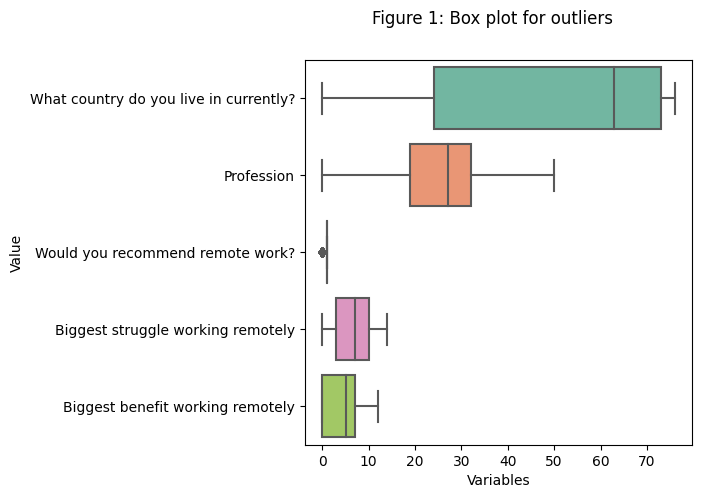

In [4]:

plt.figure(figsize=(5, 5))

sns.boxplot(data=data_num, orient="h", palette="Set2")

# Add a figure caption
plt.suptitle('Figure 1: Box plot for outliers', fontsize=12)

# Add axis labels and a title
plt.xlabel('Variables')
plt.ylabel('Value')

plt.show()

### Skewness calculation


In [ ]:
# Calculate the skewness of the column
skewness = skew(data_num["Would you recommend remote work?"])

print(skewness)

-5.280467902789969


### Minority class observation calculation bar plot

1    9343
0     313
Name: Would you recommend remote work?, dtype: int64


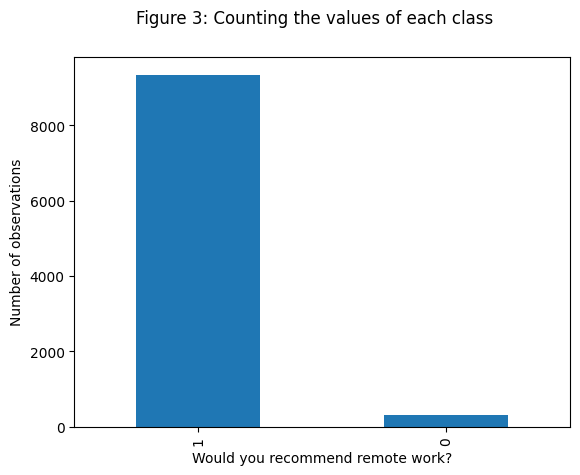

In [ ]:
count_0 = {}
data['Would you recommend remote work?'].value_counts().plot(kind='bar')

plt.suptitle('Figure 3: Counting the values of each class', fontsize=12)
plt.xlabel('Would you recommend remote work?')
plt.ylabel('Number of observations')
# plt.xticks(rotation=90)

print(data['Would you recommend remote work?'].value_counts())


### MCA with 5 components 

In [ ]:
# Perform MCA with 5 components
mca = prince.MCA(n_components=5)
mca.fit(data)

# Get the results
results = mca.transform(data)

# Print the results
print(results)


             0         1         2         3         4
0    -0.041603 -0.517613  0.073541  0.029518  0.165811
1    -0.202786 -0.989242 -0.177771  0.014823  0.863165
2    -0.236840 -0.235415 -0.113222 -0.074815  0.031501
3    -0.172139 -0.128677  0.418565 -0.020572  0.634517
4    -0.510254 -0.060465  0.017403  0.241692 -0.252754
...        ...       ...       ...       ...       ...
9651  0.858439  1.923393  0.065221 -0.534406  0.293063
9652  0.134899  0.429353 -0.369886 -0.237744  0.198145
9653  1.838802  0.041308 -0.097880  0.120371  0.852401
9654  0.544868 -0.869108 -0.331466 -0.126889  0.886931
9655 -0.187514  0.025864 -0.306118 -0.215749  0.050449

[9656 rows x 5 columns]


In [ ]:
mca.eigenvalues_, mca.total_inertia_, mca.explained_inertia_

([0.46449703900618916,
  0.26678708404851914,
  0.2565147958269855,
  0.23819543921601308,
  0.235992590663655],
 30.4,
 [0.015279507862045696,
  0.008775890922648657,
  0.00843798670483505,
  0.00783537629000043,
  0.007762914166567599])

# MCA Eigenvalues interpretation: 
### Based on the eigenvalues provided, the first component of the multiple correspondence analysis (MCA) explains the most variation in the data, with the remaining components explaining progressively less variation. This suggests that the first component captures the most important patterns and relationships within the data, and that the remaining components capture less important patterns. A possible interpretation of these results is that the first component represents the main underlying structure of the data, while the remaining components represent more subtle variations and nuances within the data. This suggests that the first component may be the most useful for understanding the overall structure of the data and for making general inferences about the data. The remaining components may be useful for understanding more specific aspects of the data, but they may not be as relevant for overall interpretation of the results. In summary, the eigenvalues of the MCA indicate that the first component is the most important for understanding the overall structure of the data, while the remaining components capture less important patterns and relationships within the data. This suggests that the first component should be given the most weight when interpreting the results of the MCA.

In [ ]:
# gain the row coordinates
mca.row_coordinates(data)

,0,1,2,3,4
0,-0.041603,-0.517613,0.073541,0.029518,0.165811
1,-0.202786,-0.989242,-0.177771,0.014823,0.863165
2,-0.236840,-0.235415,-0.113222,-0.074815,0.031501
3,-0.172139,-0.128677,0.418565,-0.020572,0.634517
4,-0.510254,-0.060465,0.017403,0.241692,-0.252754
...,...,...,...,...,...
9651,0.858439,1.923393,0.065221,-0.534406,0.293063
9652,0.134899,0.429353,-0.369886,-0.237744,0.198145
9653,1.838802,0.041308,-0.097880,0.120371,0.852401
9654,0.544868,-0.869108,-0.331466,-0.126889,0.886931


In [ ]:
# gain the column coordinates
mca.column_coordinates(data)

,0,1,2,3,4
Would you recommend remote work?,0.001446,0.002754,0.003008,0.002699,0.003582
What country do you live in currently?_Albania,0.235908,1.693045,-0.476968,0.279017,-0.201507
What country do you live in currently?_Argentina,0.011504,1.105204,0.985376,-0.913460,-0.361616
What country do you live in currently?_Australia,-0.434848,0.013539,-0.585157,0.165058,-0.968133
What country do you live in currently?_Austria,-0.501799,0.133998,0.378496,2.452650,-1.385021
...,...,...,...,...,...
Biggest benefit working remotely_I have more time because i don't commute,-0.166451,0.260293,-0.631097,0.383307,-0.197122
Biggest benefit working remotely_It's better for me financially,2.454189,-0.426992,0.480641,0.676544,-0.812877
Biggest benefit working remotely_No distractions,-0.545713,0.690942,-0.183013,-2.399460,0.121473
Biggest benefit working remotely_Productivity increased,-0.398784,-0.557664,-0.069683,-1.310409,-0.039387


In [ ]:
# Get the number of dimensions in the MCA model
n_dims = mca.n_components

# Get the variable loadings for each dimension
dimensions = mca.explained_inertia_

# Print the variable loadings for all dimensions
print('Variable loadings:')
print(dimensions)

# Interpret the dimensions in the MCA model
print('Variable loadings')
for i in range(n_dims):
  print(f'Dimension {i+1}: {dimensions[i]}')

Variable loadings:
[0.015279507862045696, 0.008775890922648657, 0.00843798670483505, 0.00783537629000043, 0.007762914166567599]
Variable loadings
Dimension 1: 0.015279507862045696
Dimension 2: 0.008775890922648657
Dimension 3: 0.00843798670483505
Dimension 4: 0.00783537629000043
Dimension 5: 0.007762914166567599


### Based on the results we provided, the multiple correspondence analysis (MCA) model identified five dimensions in the data. The variable loadings for each dimension indicate the strength of the association between each variable and the corresponding dimension in the MCA model.

### For example, the variable loading for the first dimension is 0.015279, which indicates that there is a weak association between the first variable and the first dimension. Similarly, the variable loading for the second dimension is 0.008775, which indicates that there is a very weak association between the second variable and the second dimension.

### The overall interpretation of the dimensions in the MCA model is that the first five variables in the data are weakly associated with the first five dimensions, respectively. This suggests that the first six variables are not strongly related to each other and that they contribute independently to the structure of the data.

### To further understand the relationships between the variables and the dimensions in the MCA model, it would be useful to examine the row coordinates for the observations in the data. The row coordinates indicate the position of each observation in the MCA model and can be used to understand the relationships between the observations and the dimensions in the model.

### To compute the row coordinates, you can use the "row_coordinates" method of the "MCA" object, which returns a Pandas DataFrame with the coordinates for each observation in the data. You can then use the "iloc" method of the DataFrame to select the coordinates for the first two dimensions in the MCA model and visualize the relationships between the observations and the dimensions.



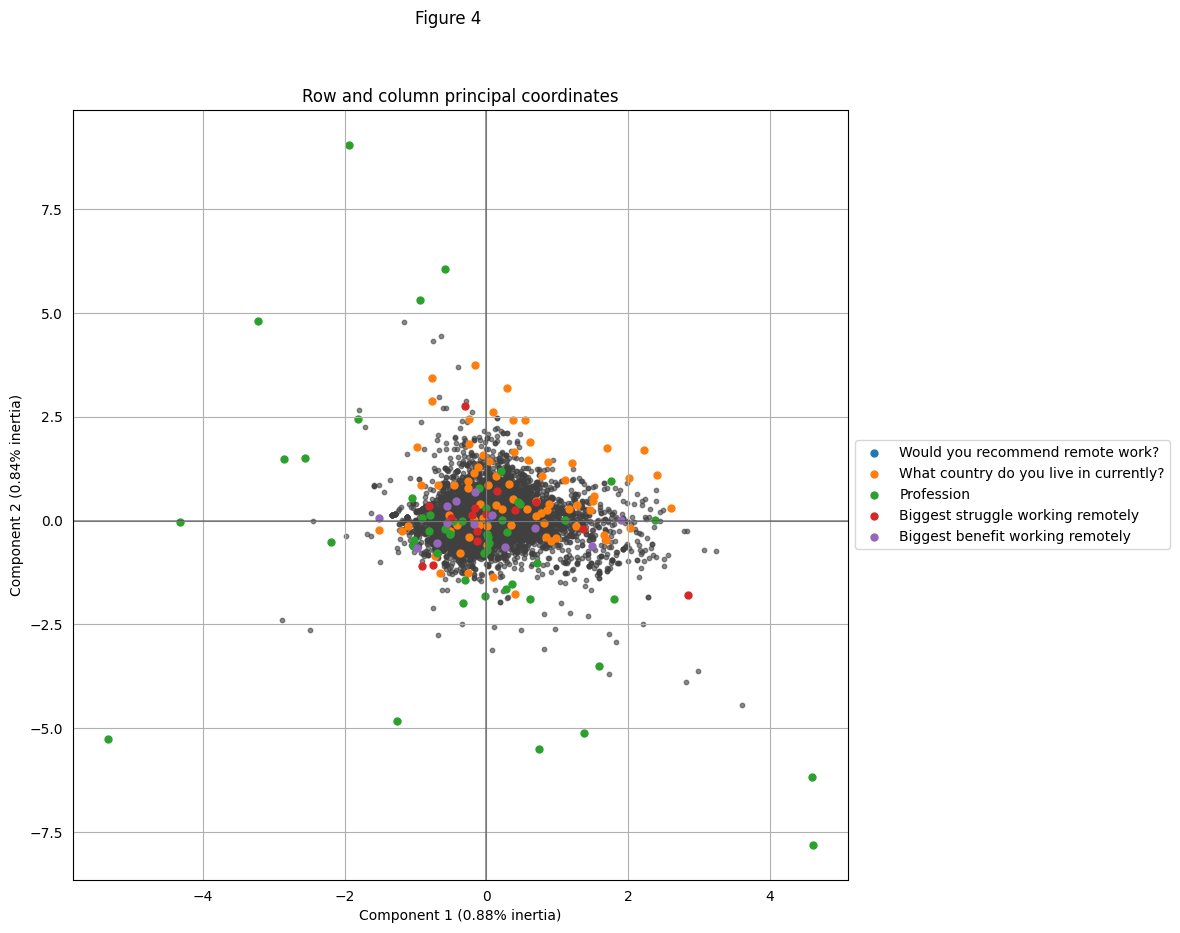

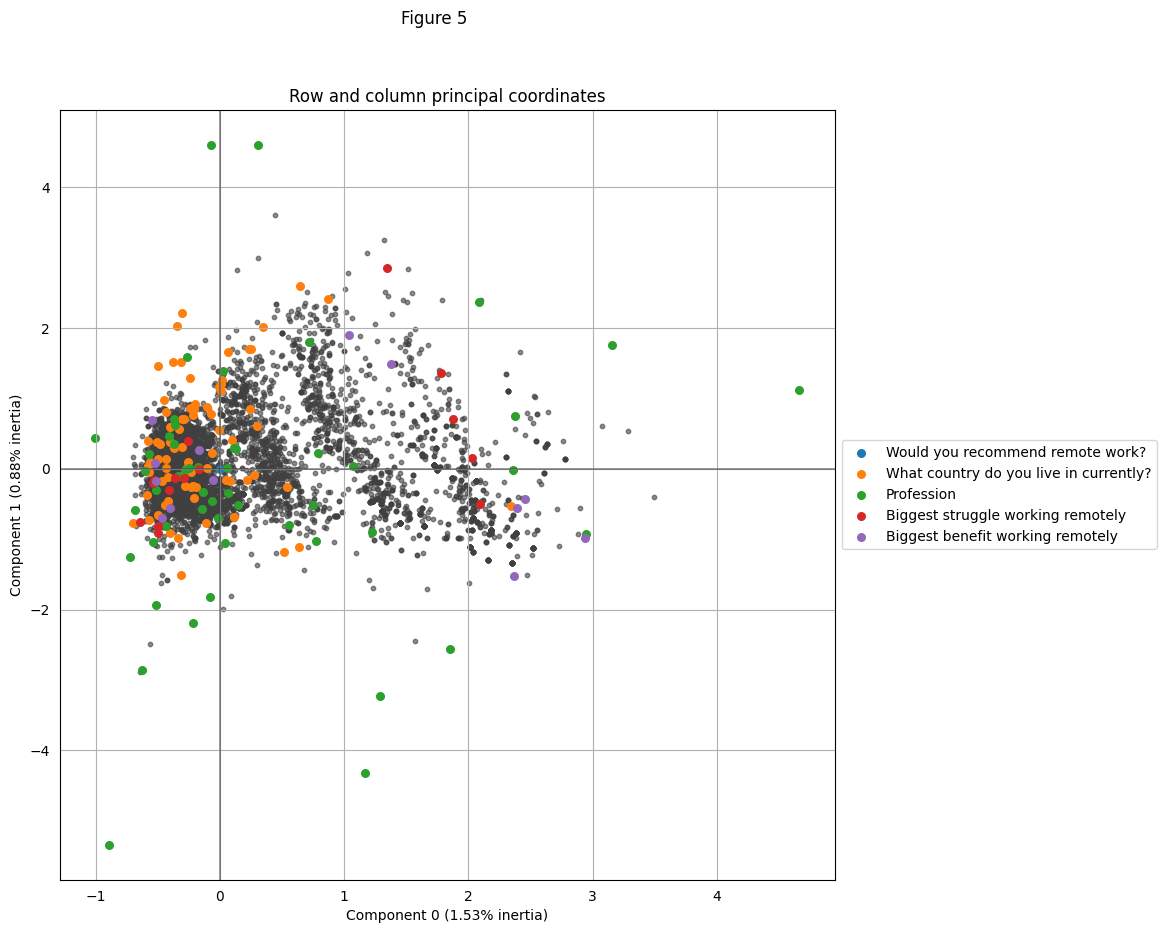

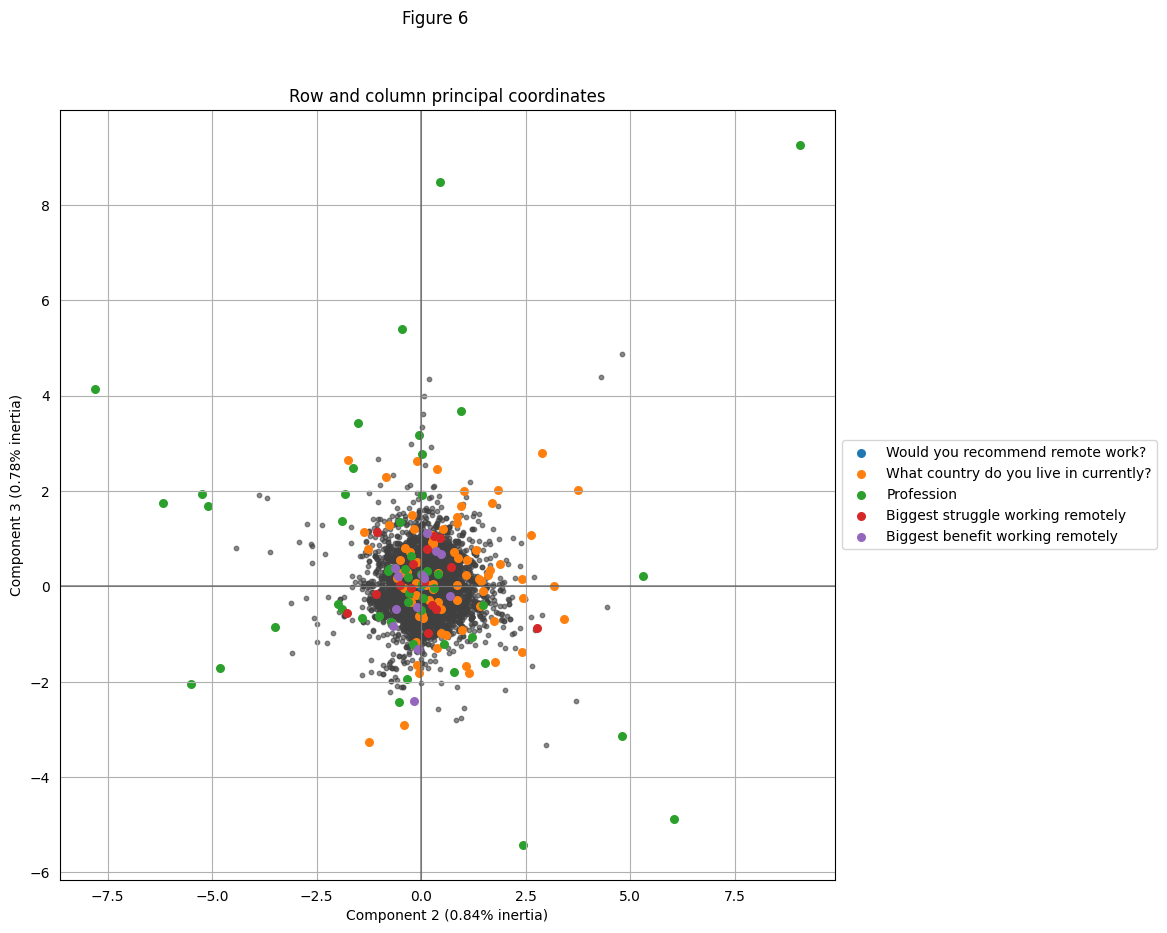

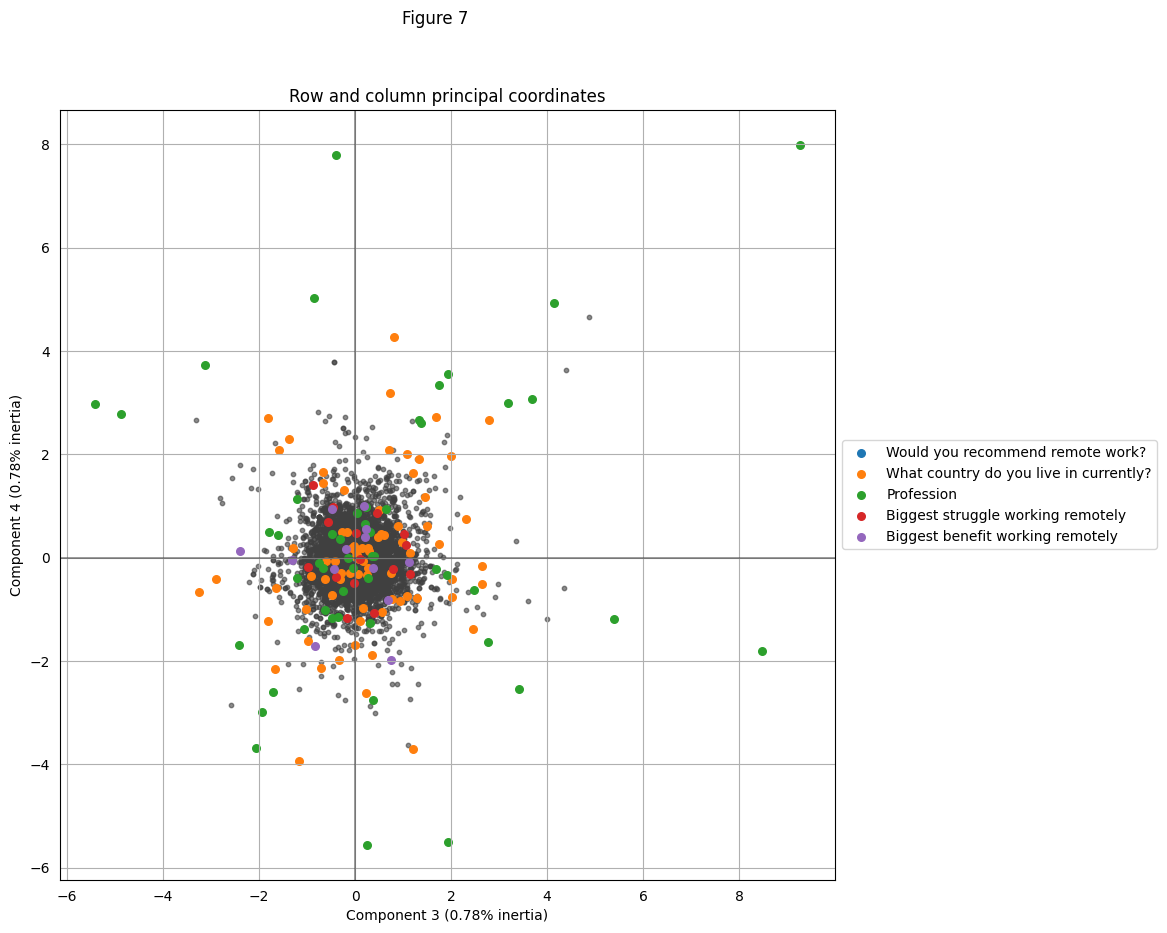

In [ ]:
#plot trhe results of mca on specific dimensions and variables
mca.plot_coordinates(
 X = data,
 x_component=1,
 y_component=2,
 show_row_points=True,
  show_row_labels=False, #Changing this into True will show the number of each observation
   show_column_points=True,
    show_column_labels=False, #Changing this into True will show the names of the variables
    figsize=(10,10),
    column_points_size=25
    ).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle('Figure 4')
plt.show()
    
#plot trhe results of mca on specific dimensions and variables
mca.plot_coordinates(data,
 x_component=0,
 y_component=1,
 show_row_points=True,
  show_row_labels=False,
   show_column_points=True,
    show_column_labels=False,
    figsize=(10,10),
    column_points_size=30
    ).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle('Figure 5')    
plt.show()
    
#plot trhe results of mca on specific dimensions and variables
mca.plot_coordinates(data,
 x_component=2,
 y_component=3,
 show_row_points=True,
  show_row_labels=False,
   show_column_points=True,
    show_column_labels=False,
    figsize=(10,10),
    column_points_size=30
    ).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle('Figure 6')
plt.show()

mca.plot_coordinates(data,
 x_component=3,
 y_component=4,
 show_row_points=True,
  show_row_labels=False,
   show_column_points=True,
    show_column_labels=False, #if true it will show a description of the points on the graph
    figsize=(10,10),
    column_points_size=30
    ).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle('Figure 7')
plt.show()

Text(0.5, 0.98, 'Figure ')

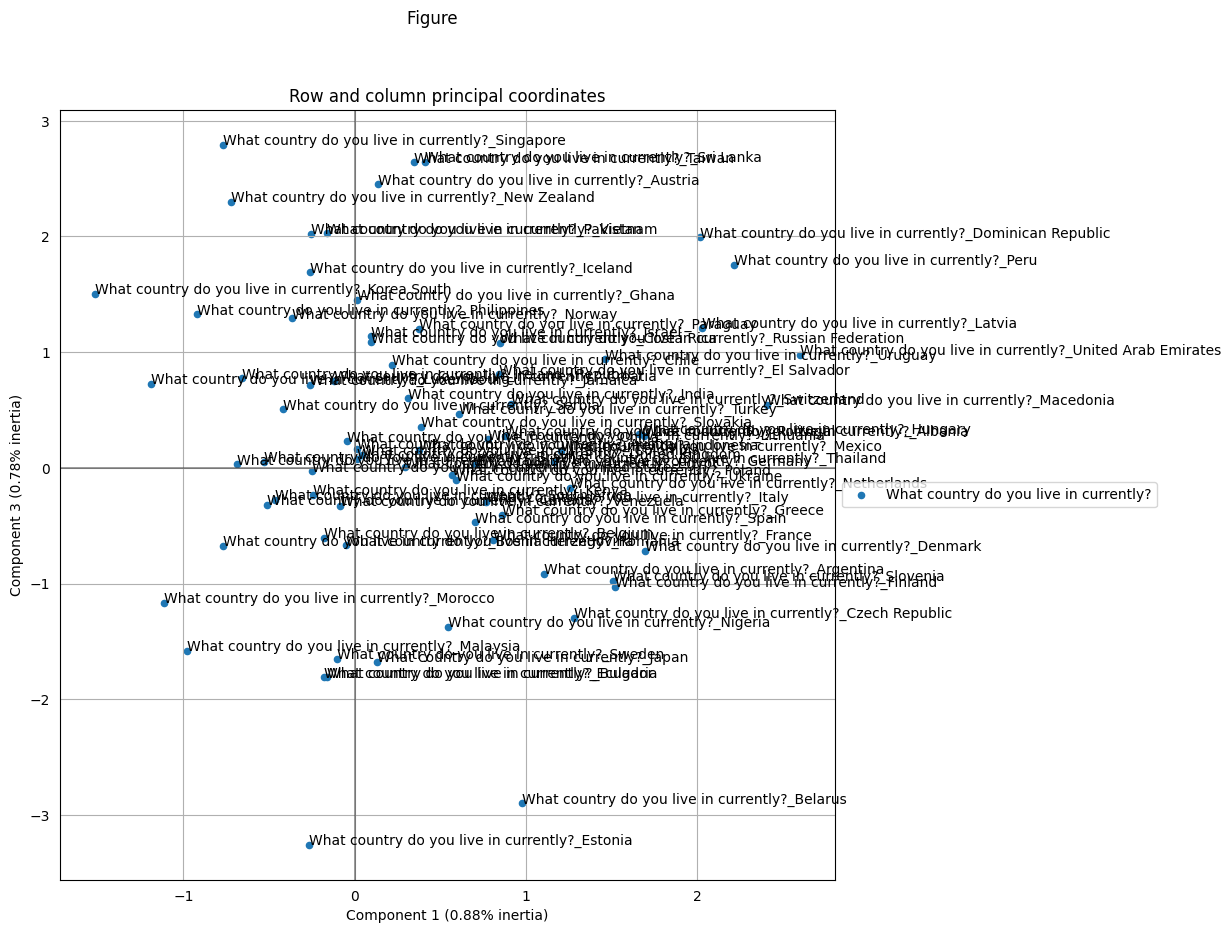

In [ ]:
ax = mca.plot_coordinates(
     X=data[["What country do you live in currently?"]],
     ax=None,
     figsize=(10, 10),
     x_component=1,
     y_component=3,
     show_row_points=False,
     row_points_size=0,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=20,
     show_column_labels=True,
 ).legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle('Figure ', fontsize=12)
 #biplot in the mca for "What country do you live in currently?" on dimension 1 and 3

### Creating n number of clusters.

In [ ]:
# Create a KModes model with the desired number of clusters
km = KModes(n_clusters=5,
 init= "random",
  n_init=5,
   verbose=1,
    random_state=42)

# Fit the model to the data
km.fit(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3445, cost: 20854.0
Run 1, iteration: 2/100, moves: 486, cost: 20854.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1524, cost: 21894.0
Run 2, iteration: 2/100, moves: 303, cost: 21894.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3304, cost: 21124.0
Run 3, iteration: 2/100, moves: 317, cost: 21124.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4262, cost: 22700.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3626, cost: 21609.0
Run 5, iteration: 2/100, moves: 444, cost: 21609.0
Best run was number 1


KModes(init='random', n_clusters=5, n_init=5, random_state=42, verbose=1)

### In the clusters_labels which is an ndarray we saved the label of each cluster aka the number of the cluster which eavery observation belongs.

In [ ]:
# Obtain the cluster labels for each data point
cluster_labels = km.predict(data)

In [ ]:
#from the moment we create a new column of the data (cluster) we cannot use the mca.row_coordinates(data) anymore due to dimesnion dismatch
data["cluster"] = cluster_labels
data_num["cluster"] = cluster_labels 
# cluster_data = cluster_labels

# Print the cluster labels for each data point
print(cluster_labels)

[3 0 4 ... 0 0 0]


### Accessing the centroids of clusters.

In [ ]:
# Access the cluster centroids
centroids = km.cluster_centroids_

# Print the cluster centroids
print(centroids)

[['United States' 'Engineering' '1' 'Not being able to unplug'
  "I have more time because i don't commute"]
 ['United States' 'Marketing and advertising services' '1'
  'Staying motivated' 'Ability to have a flexible schedule']
 ['Brazil' 'Engineering' '1' 'No struggle'
  'Flexibility to work from any location']
 ['United States' 'Design' '1'
  'Difficulties with collaboration and communication'
  'Ability to have a flexible schedule']
 ['United States' 'Engineering' '1' 'Loneliness'
  'Flexibility to work from any location']]


### Iterations over clusters in order to obtain the number of observations that corresponds to each cluster.

In [ ]:
# Loop over the clusters
for i in range(5):
    # Select the data points belonging to cluster i
    cluster_data = data[cluster_labels == i]

    # Print the number of data points in cluster i
    print(f'Cluster {i} has {cluster_data.shape[0]} data points')


Cluster 0 has 3939 data points
Cluster 1 has 1988 data points
Cluster 2 has 1561 data points
Cluster 3 has 1006 data points
Cluster 4 has 1162 data points


In [ ]:
# Group the data by the cluster column
groups = data.groupby('cluster')

# Iterate over the groups and create a new data frame for each group
for name, group in groups:
  # Create a new data frame for the current group
  cluster_df = pd.DataFrame(group)

  # Assign the data frame to a variable with a name that corresponds to the cluster number
  globals()[f'cluster_{name}'] = cluster_df

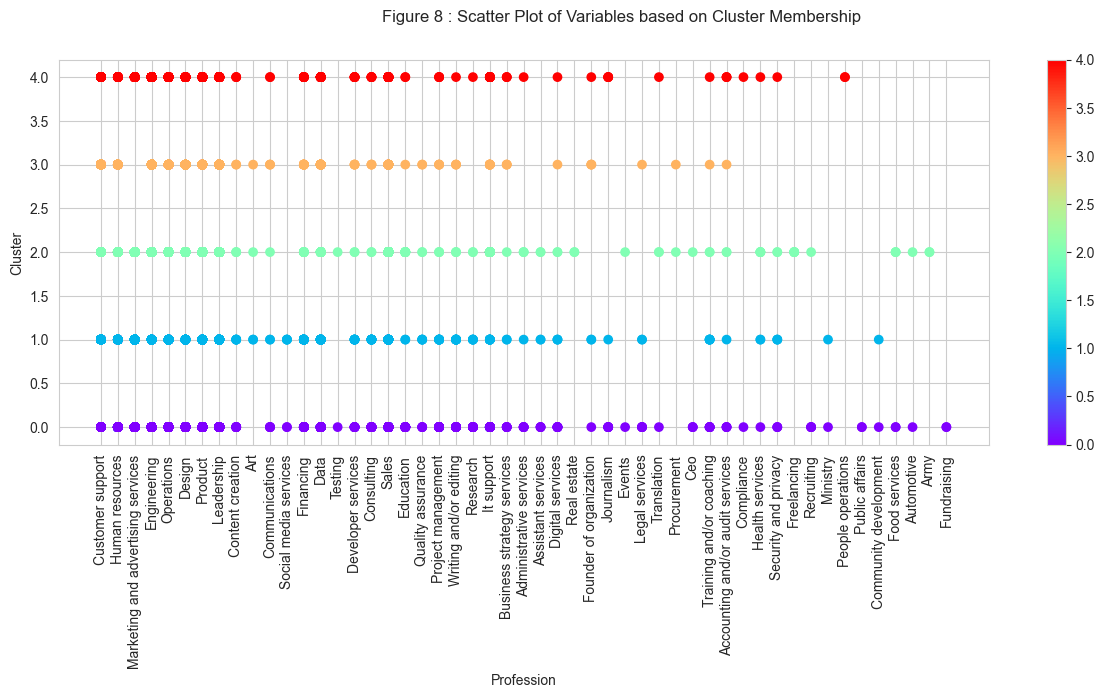

In [ ]:
# Assume that you have the x and y variables stored in variables "x" and "y", respectively, and the cluster membership stored in a variable "clusters"
x = data['Profession']
y = data['cluster']

# Set the figure size
plt.figure(figsize=(15, 5))

# Create a scatter plot
plt.scatter(x, y, c=data['cluster'], cmap='rainbow')

# Add a color bar to show the cluster membership
plt.colorbar()

# Set the position of the x ticks
plt.xticks(rotation=90)

# Add axis labels and a title
plt.xlabel('Profession')
plt.ylabel('Cluster')
plt.suptitle('Figure 8 : Scatter Plot of Variables based on Cluster Membership', fontsize=12)

# Show the plot
plt.show()

### Heatmap in order to obtain the correlation between the variables and the unique levels  

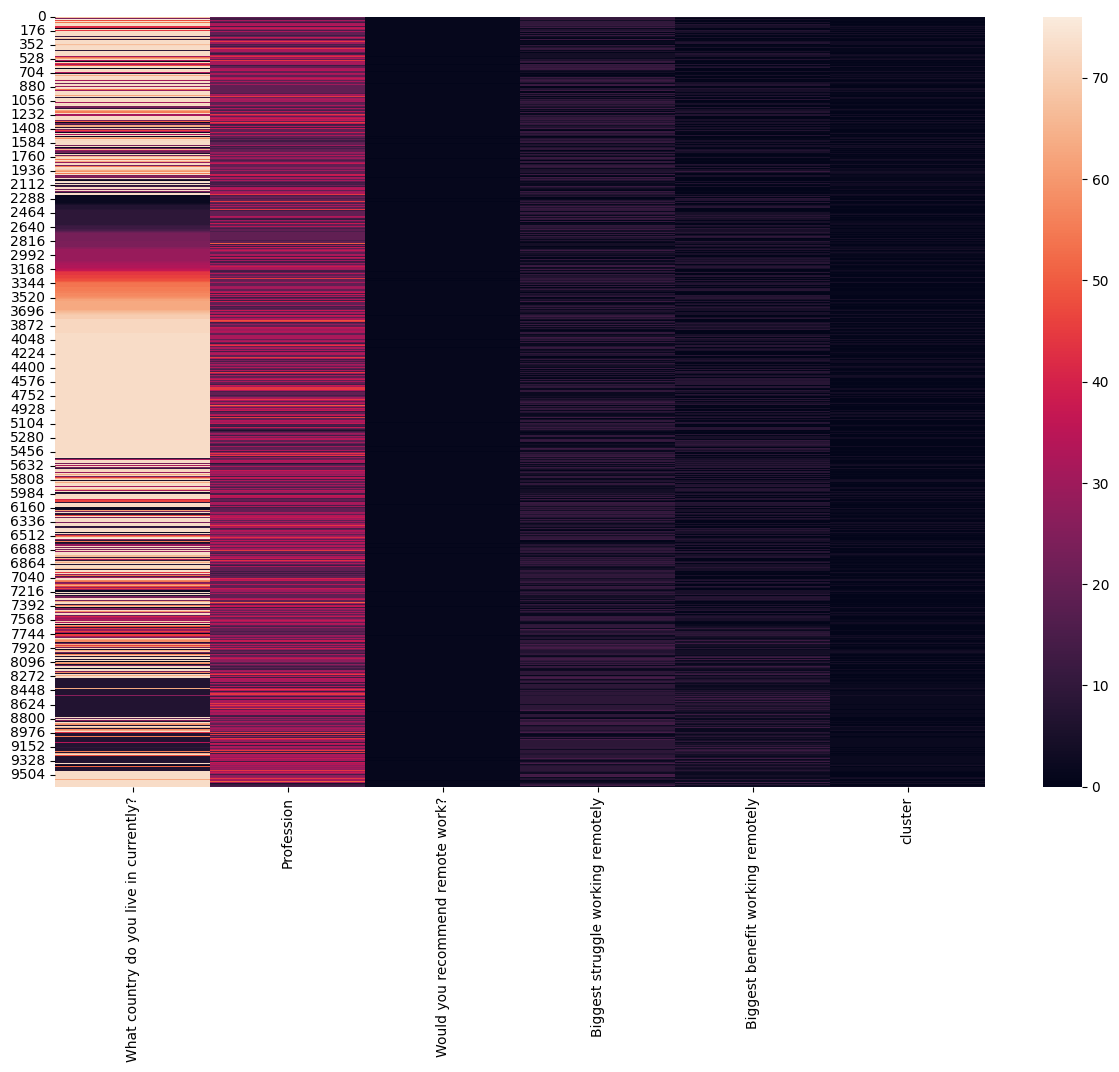

In [ ]:
# Extract the unique values from the data
values = data.apply(pd.Series.unique)

# Create a categorical color map
cmap = sns.color_palette("tab20", n_colors=len(values))

plt.figure(figsize=(15, 10))


# Create a heatmap
sns.heatmap(data_num)

# Show the plot
plt.show()

### Corrplot between the variables to obtain the correlation between the variables 

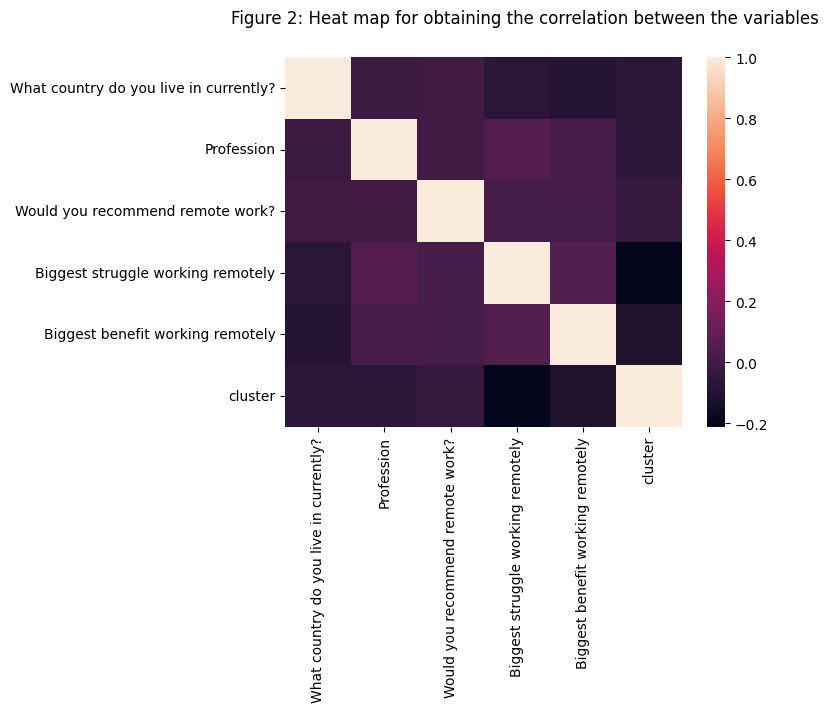

In [ ]:
# Compute the correlations between the variables
corr = data_num.corr()

# Add a figure caption
plt.suptitle('Figure 2: Heat map for obtaining the correlation between the variables', fontsize=12)

# Create a heatmap of the correlations
sns.heatmap(corr)

# Show the plot
plt.show()

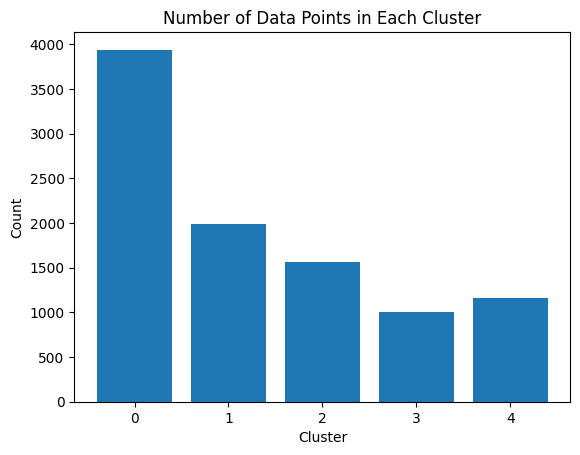

In [ ]:
cluster_counts = {}

for label in cluster_labels:
    if label in cluster_counts:
        cluster_counts[label] += 1
    else:
        cluster_counts[label] = 1

# Assume that `clusters` is a list or array containing the cluster labels for each data point
# and `cluster_counts` is a dictionary mapping each cluster label to the number of data points in that cluster
cluster_labels, cluster_counts = zip(*cluster_counts.items())

# Create a bar chart
plt.bar(cluster_labels, cluster_counts)

# Add axis labels and a title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of Data Points in Each Cluster')

# Show the plot
plt.show()


In [ ]:
# Print the most common values for each attribute in cluster i
for j in range(data.shape[1]):
        # Compute the mode of the j-th attribute in cluster i
        attr_mode = cluster_data.iloc[:, j].mode()

        # Print the most common value for the j-th attribute
        print(f' - Attribute {j} has mode {attr_mode}')

 - Attribute 0 has mode 0    United States
Name: What country do you live in currently?, dtype: object
 - Attribute 1 has mode 0    Engineering
Name: Profession, dtype: object
 - Attribute 2 has mode 0    1
Name: Would you recommend remote work?, dtype: int64
 - Attribute 3 has mode 0    Loneliness
Name: Biggest struggle working remotely, dtype: object
 - Attribute 4 has mode 0    Flexibility to work from any location
Name: Biggest benefit working remotely, dtype: object
 - Attribute 5 has mode 0    4
Name: cluster, dtype: uint16


### Evaluating the scores of the levels of each variable in an importance plot.

/var/folders/kh/qrz63p_x5s35wcrl4vcg5fh40000gn/T/ipykernel_39931/3837146529.py:22: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x=datset['scores'][0:40], y=datset['feature'][0:30], color='green')


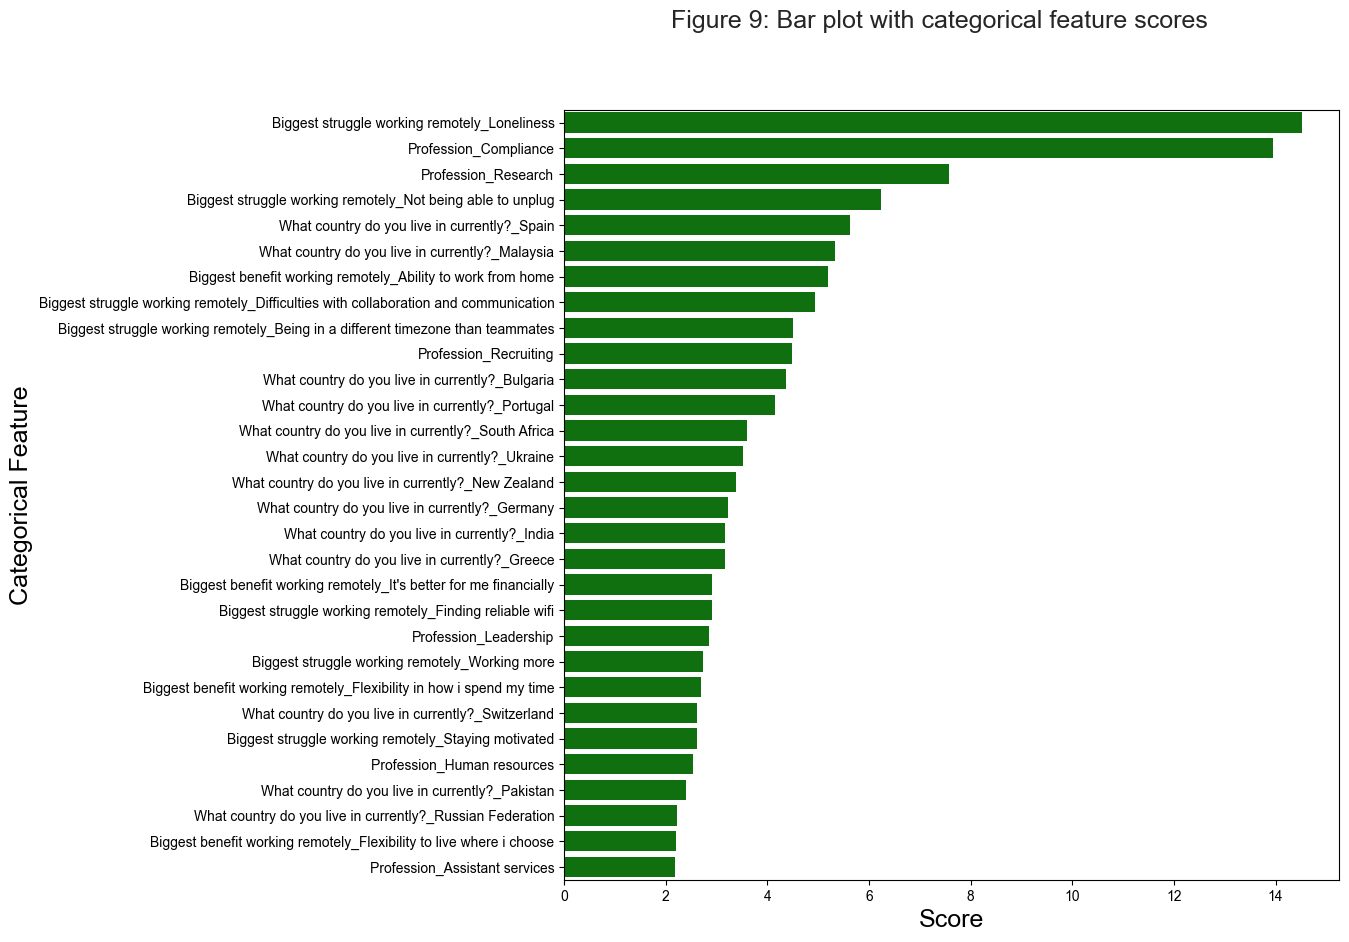

In [ ]:
#creating a new data set with dummy variables of the original data set
data_2 = pd.get_dummies(data)

x2 = data_2.drop(columns= ['Would you recommend remote work?', "cluster"], axis=1) # input categorical features, we can exclude the variable cluster but not sure yet 
y2 = data_2['Would you recommend remote work?'] # target variable

# categorical feature selection
sf = SelectKBest(chi2, k="all")
sf_fit = sf.fit(x2, y2)
# # print feature scores
# for i in range(len(sf_fit.scores_)):
#     print(' %s: %f' % (x2.columns[i], sf_fit.scores_[i]))
    
data_3 = pd.DataFrame()
data_3['feature'] = x2.columns
data_3['scores'] = sf_fit.scores_
datset = data_3.sort_values(by='scores', ascending=False)

plt.figure(figsize=(10, 10))

# plot the scores
sns.barplot(x=datset['scores'][0:40], y=datset['feature'][0:30], color='green')
sns.set_style('whitegrid')
plt.suptitle('Figure 9: Bar plot with categorical feature scores', fontsize=18)
plt.ylabel('Categorical Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

### Even though the interpretabilty of the plot below is difficult to coprehend it helps to understand the complexity of the connection between the variables and their levels with respect of the cluster they belong to.


In [ ]:
# Create a parallel coordinates plot
fig = px.parallel_coordinates(data_num, dimensions=["Profession",
 "Would you recommend remote work?",
 "What country do you live in currently?",
  "Biggest struggle working remotely",
   "Biggest benefit working remotely"],color="cluster")

# Display the plot
fig.show()


/Users/dimitristoromanidis/opt/anaconda3/envs/pythonakias/lib/python3.9/site-packages/plotly/express/_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [
